<a href="https://colab.research.google.com/github/Claudia060392/Analisis-Bienestar-Tecnologico/blob/main/Tech_Use_%26_Stress_Wellness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import pandas as pd

# Carga del archivo manualmente
archivo = files.upload()

# Lectura del CSV
df = pd.read_csv("Tech_Use_Stress_Wellness.csv")

# Primeras filas
print(df.head())

Saving Tech_Use_Stress_Wellness.csv to Tech_Use_Stress_Wellness (2).csv
   user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0        1   53    Male                      6.8                2.9   
1        2   66  Female                      4.1                2.1   
2        3   43    Male                      4.7                3.6   
3        4   29  Female                      6.0                4.5   
4        5   57    Male                      6.7                3.4   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 2.1                 0.5             2.0                 2.3   
1                 1.6                 0.4             0.8                 2.8   
2                 0.0                 0.5             1.4                 3.7   
3                 0.0                 0.2             1.3                 4.5   
4                 2.0                 0.8             1.2                 3.8   

   work_relate

Dimensiones: (5000, 25)
Columnas: ['user_id', 'age', 'gender', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'location_type', 'mental_health_score', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']

Tipos de datos:
user_id                               int64
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours               

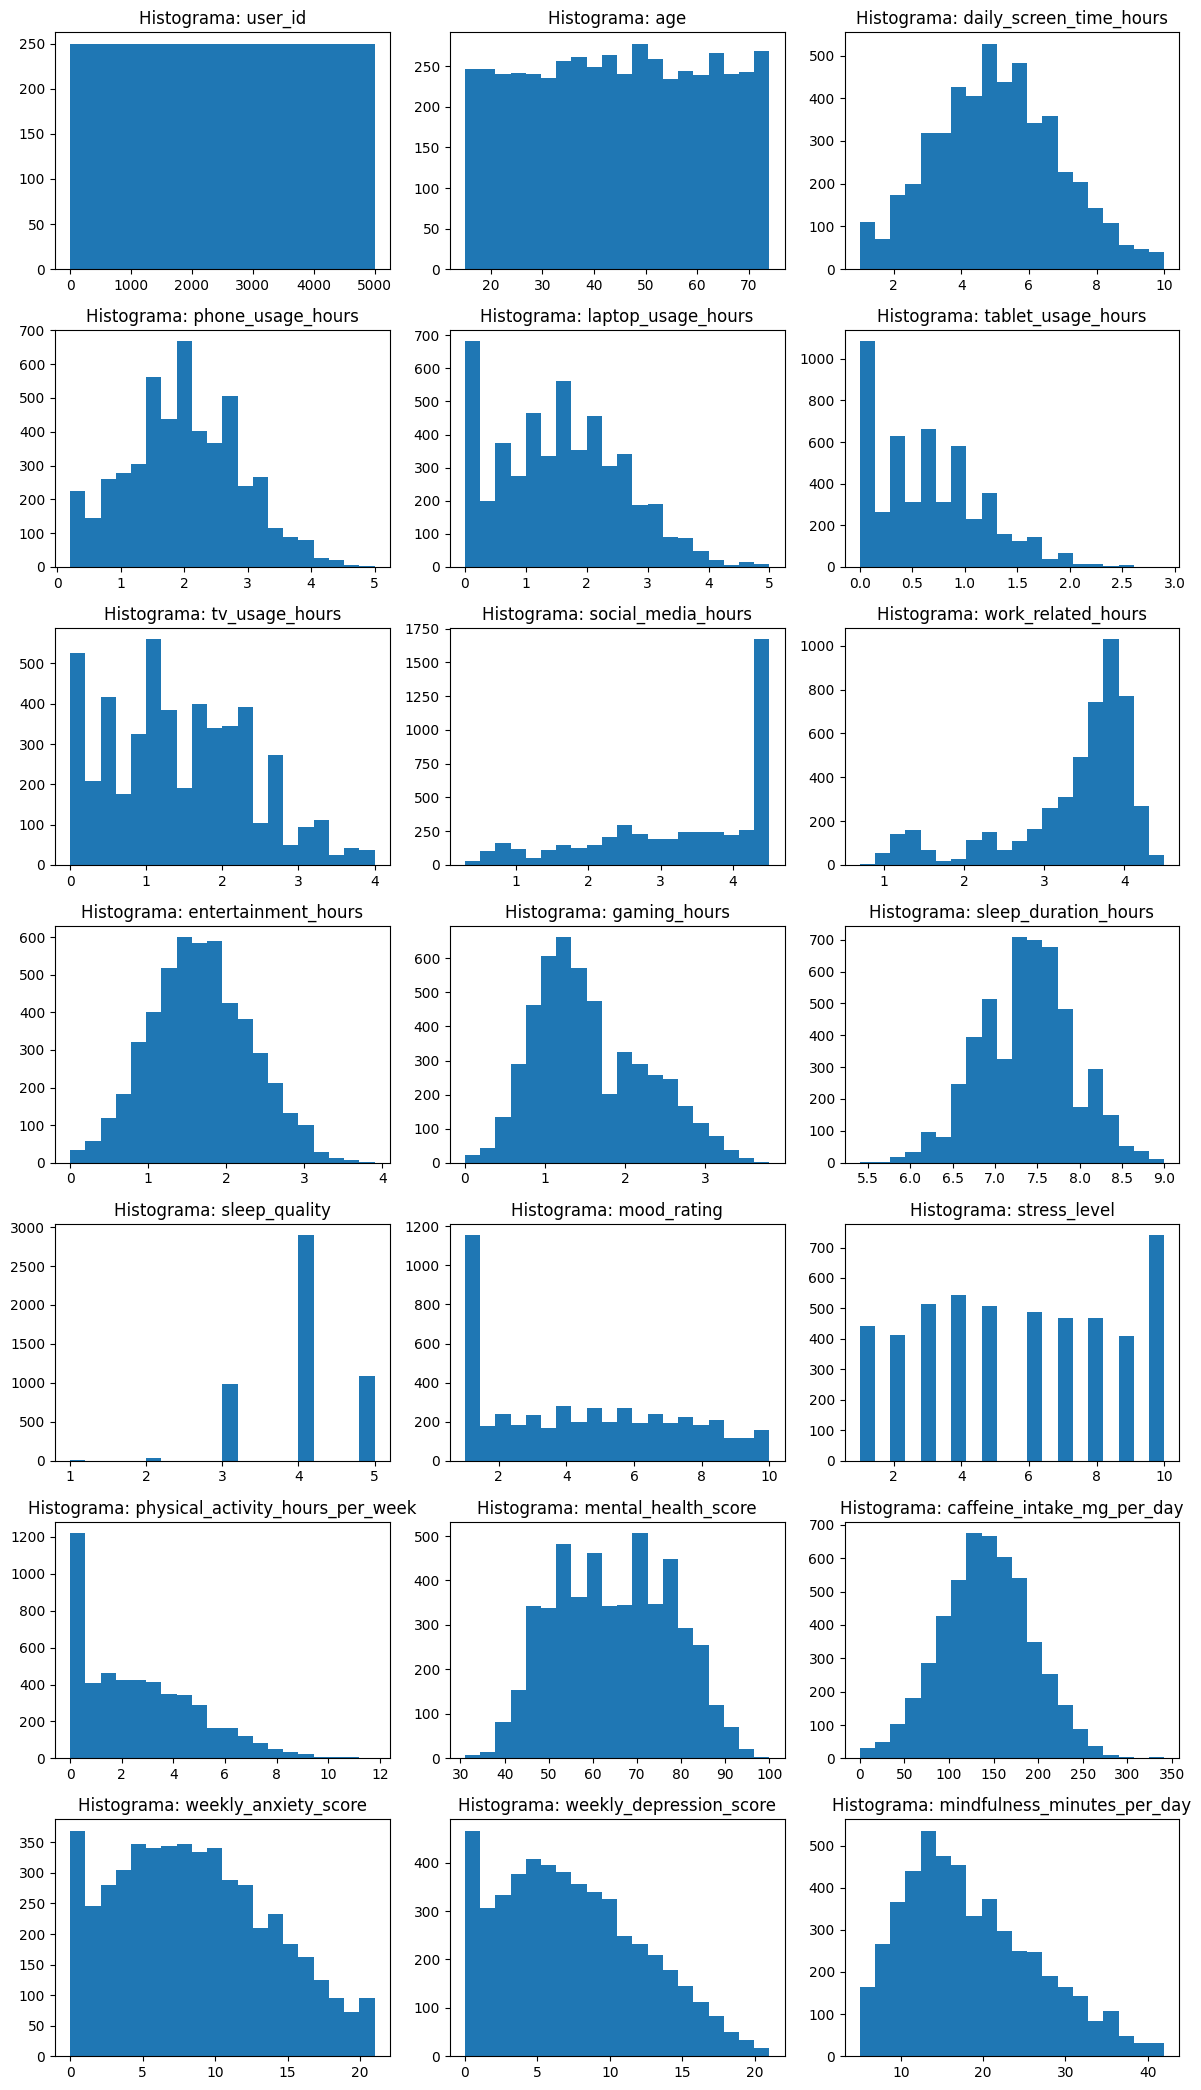

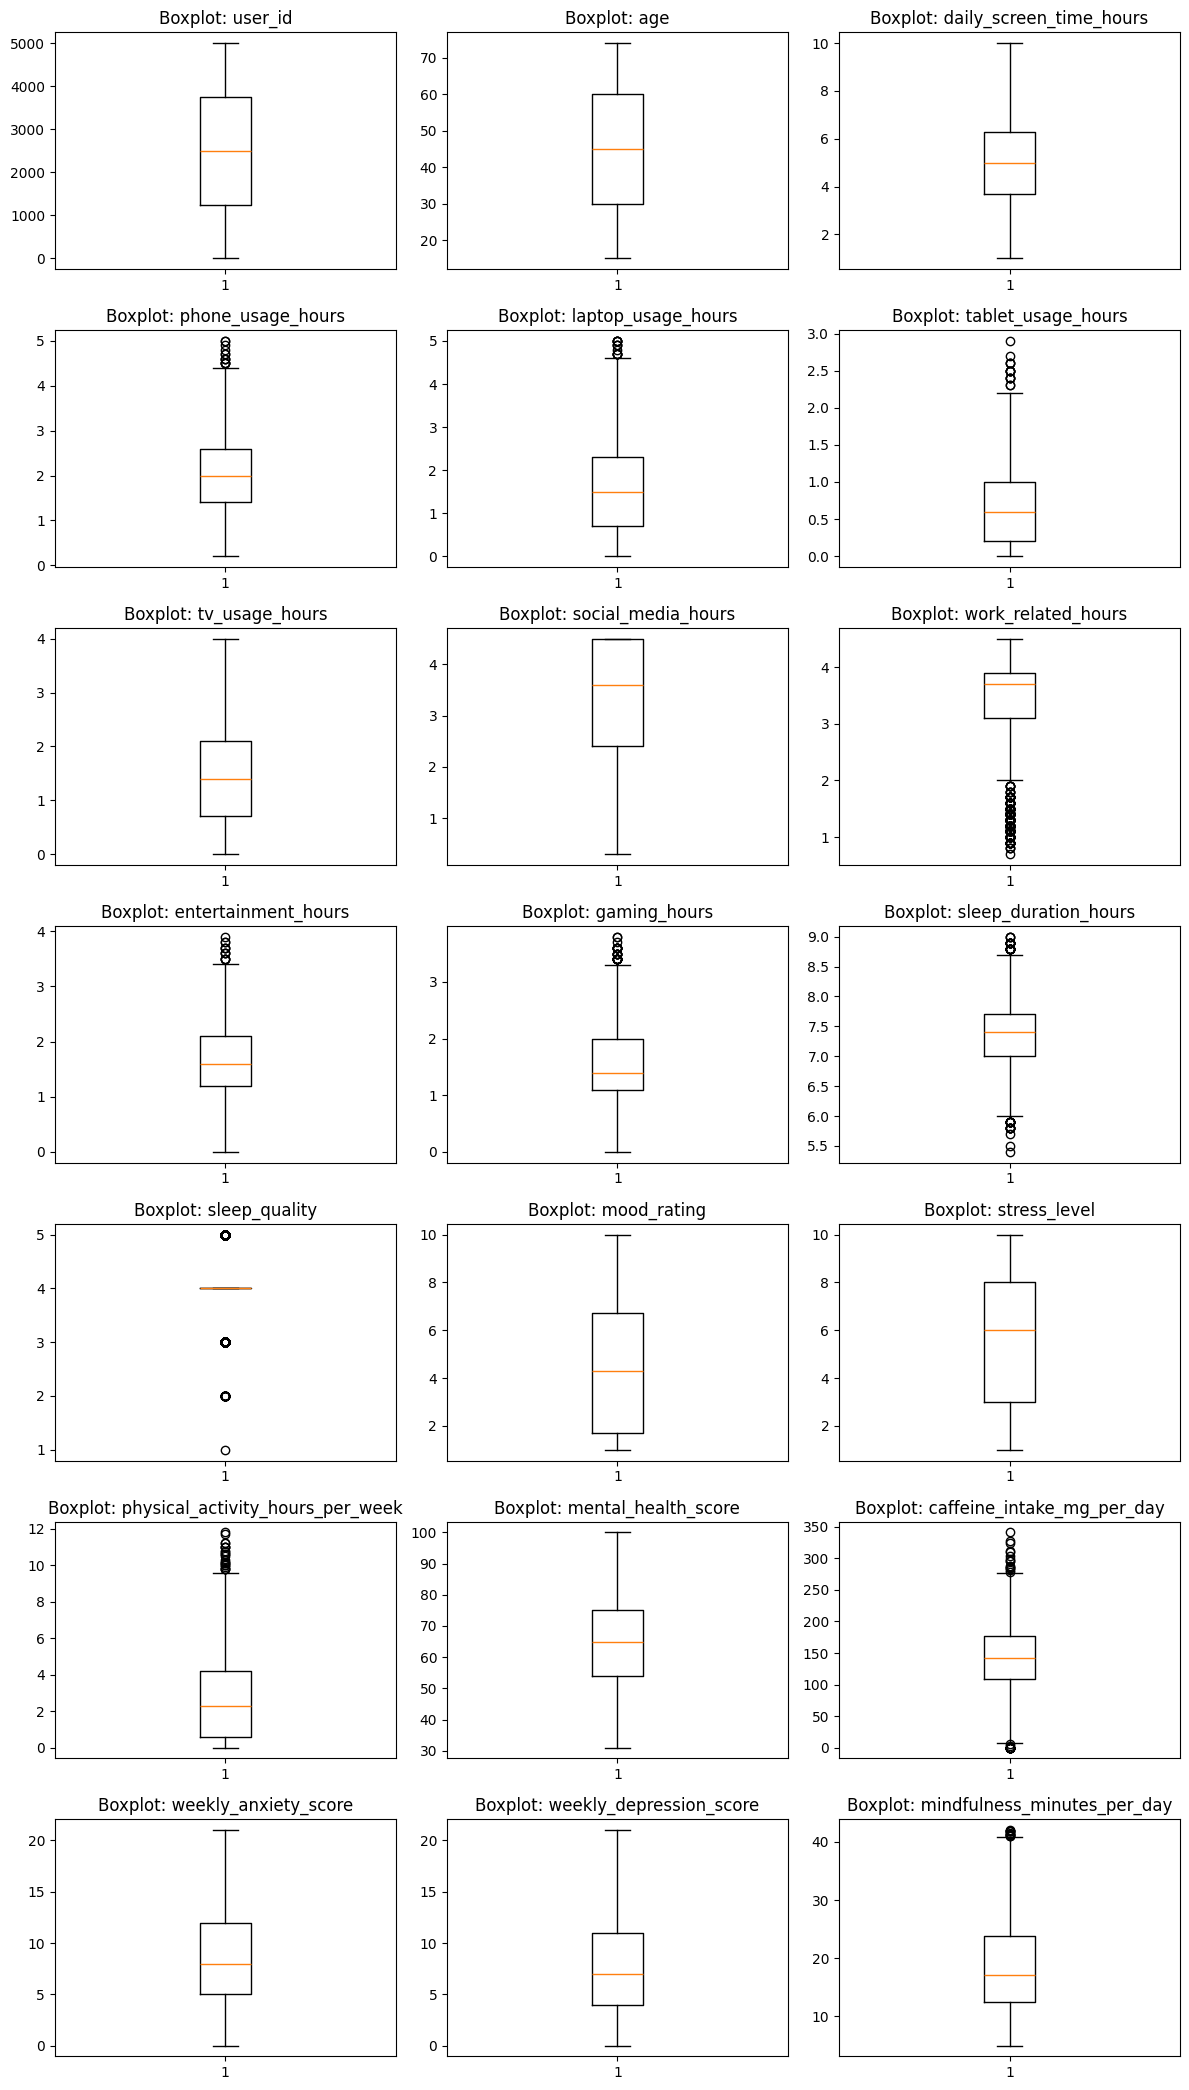

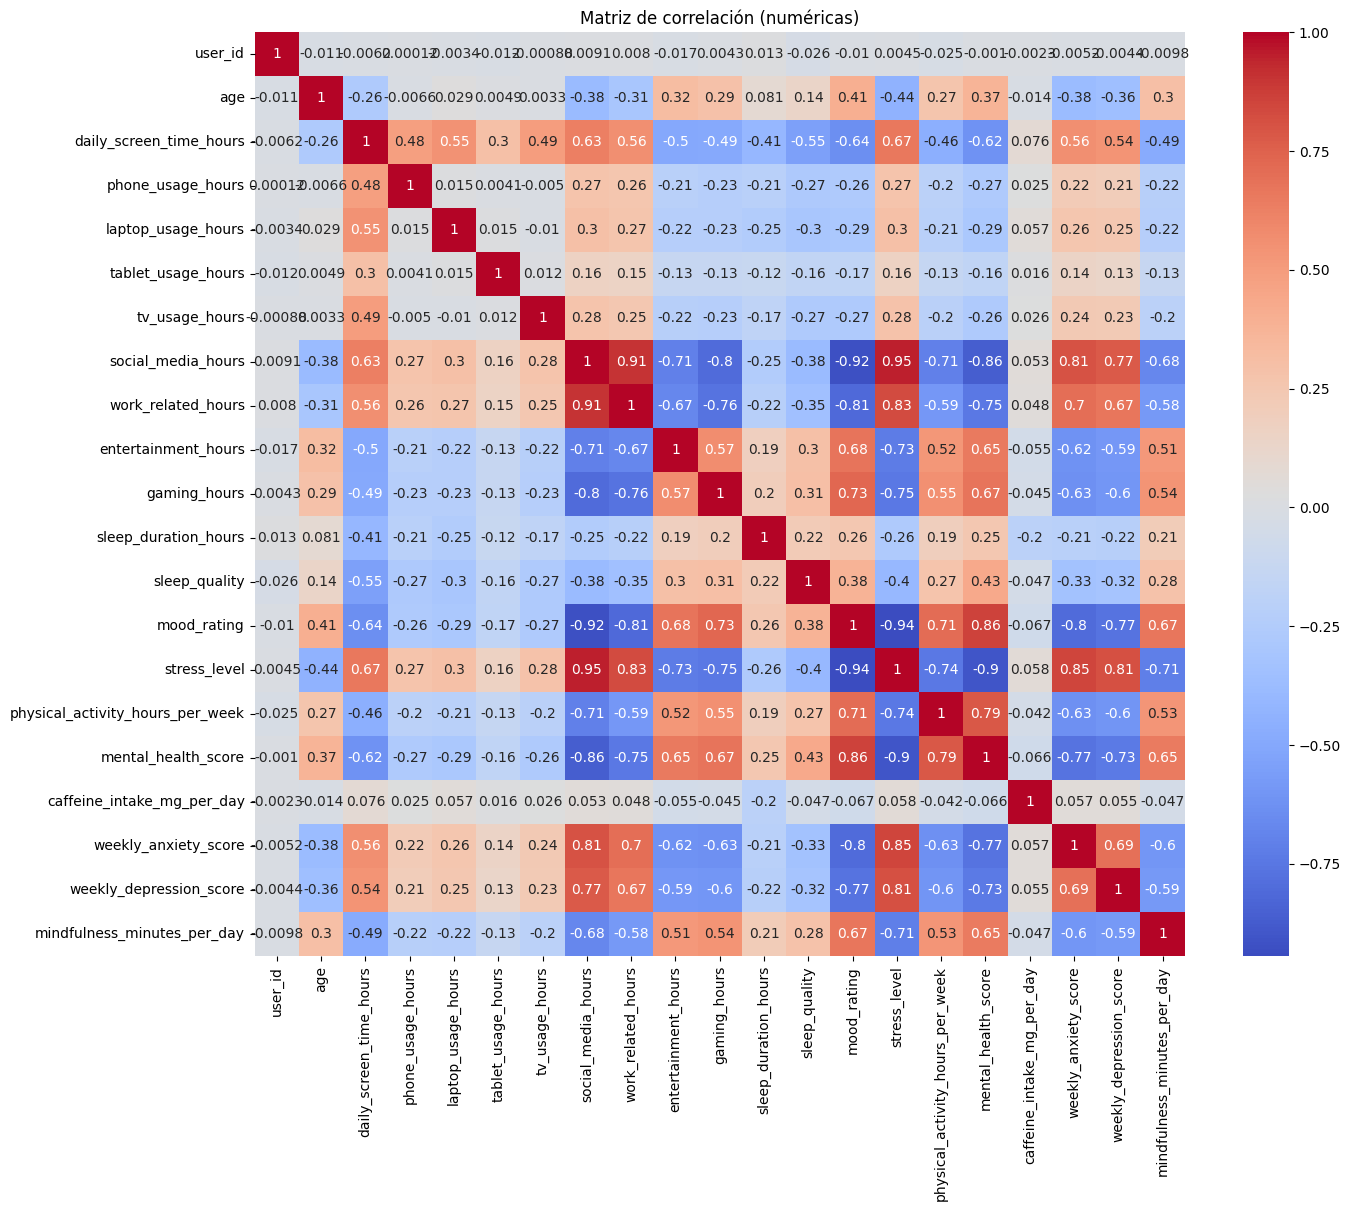


[Regresión Lineal]  MAE=0.4185 | MSE=0.2838 | RMSE=0.5327 | R²=0.9665

[RandomForestRegressor(200)]  MAE=0.2145 | MSE=0.1232 | RMSE=0.3510 | R²=0.9854

Mejor modelo por MSE: RandomForestRegressor(200)  ->  MSE=0.1232, R²=0.9854


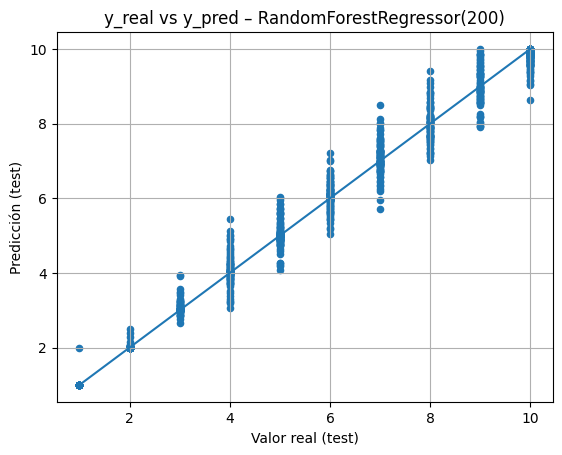

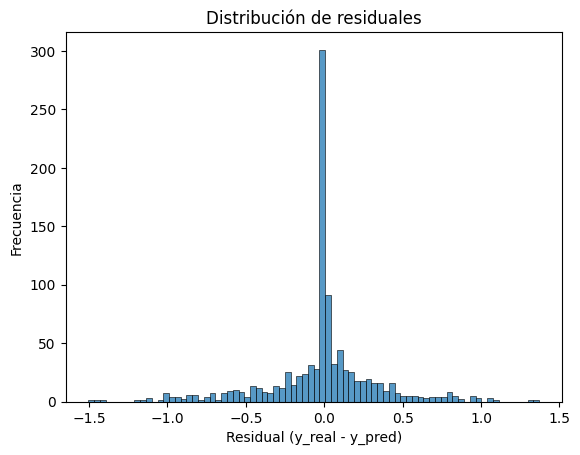


Top 10 variables más influyentes (RandomForest):
social_media_hours             0.911079
work_related_hours             0.053936
mood_rating                    0.010837
mindfulness_minutes_per_day    0.004966
entertainment_hours            0.004071
mental_health_score            0.003697
weekly_anxiety_score           0.001295
weekly_depression_score        0.001256
age                            0.001227
gaming_hours                   0.001015
dtype: float64


In [8]:
# ================================================================
# Proyecto: Tech Use & Stress Wellness
# Comparación de modelos (Regresión Lineal vs Random Forest)
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------------------------------------
# 1) Carga de datos
# -----------------------------------------------------------
# Columna objetivo y columnas presentes en el dataset
OBJETIVO = "stress_level"
CSV_PATH = "Tech_Use_Stress_Wellness.csv"

df = pd.read_csv(CSV_PATH)

print("Dimensiones:", df.shape)
print("Columnas:", list(df.columns))
print("\nTipos de datos:")
print(df.dtypes)

# -----------------------------------------------------------
# 2) Estadísticas básicas
# -----------------------------------------------------------
faltantes = df.isna().sum().sort_values(ascending=False)
print("\nValores faltantes por columna:")
print(faltantes)

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("\nNuméricas:", num_cols)
print("Categóricas:", cat_cols)

if len(num_cols) > 0:
    desc = df[num_cols].describe().T
    print("\nDescriptivos numéricos:")
    print(desc)

for c in cat_cols[:5]:
    print(f"\nFrecuencias de {c}:")
    print(df[c].value_counts(dropna=False).head(10))

# -----------------------------------------------------------
# 3) Visualizaciones básicas
# -----------------------------------------------------------
if len(num_cols) > 0:
    n = len(num_cols)
    filas = int(np.ceil(n/3))
    fig, axes = plt.subplots(filas, 3, figsize=(12, 3*filas))
    axes = axes.flatten()
    for i, c in enumerate(num_cols):
        axes[i].hist(df[c].dropna(), bins=20)
        axes[i].set_title(f"Histograma: {c}")
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.show()

if len(num_cols) > 0:
    n = len(num_cols)
    filas = int(np.ceil(n/3))
    fig, axes = plt.subplots(filas, 3, figsize=(12, 3*filas))
    axes = axes.flatten()
    for i, c in enumerate(num_cols):
        axes[i].boxplot(df[c].dropna(), vert=True)
        axes[i].set_title(f"Boxplot: {c}")
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.show()

if len(num_cols) >= 2:
    plt.figure(figsize=(15, 12))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Matriz de correlación (numéricas)")
    plt.show()

# -----------------------------------------------------------
# 4) Preparación de datos
# -----------------------------------------------------------
if OBJETIVO not in df.columns:
    raise ValueError(f"No se encontró la columna objetivo '{OBJETIVO}'.")

# Identificador que no debe usarse como predictor
cols_excluir = ["user_id"]

# Imputación simple
df = df.copy()
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mean())
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

# Separación X / y
y = df[OBJETIVO].astype(float)
X = df.drop(columns=[OBJETIVO] + [c for c in cols_excluir if c in df.columns])

# Dummies de categóricas de baja cardinalidad
cat_cols_actuales = [c for c in cat_cols if c in X.columns]
cat_bajas = [c for c in cat_cols_actuales if X[c].nunique() <= 20]
X = pd.get_dummies(X, columns=cat_bajas, drop_first=True)

# Tipos numéricos y nulos
X = X.apply(pd.to_numeric, errors="coerce").fillna(0.0)

# Columnas numéricas originales para escalado
num_cols_X = [c for c in num_cols if c in X.columns]

scaler = StandardScaler()
X_scaled = X.copy()
if len(num_cols_X) > 0:
    X_scaled[num_cols_X] = scaler.fit_transform(X[num_cols_X])

# -----------------------------------------------------------
# 5) División de datos
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------
# 6) Modelos comparados
# -----------------------------------------------------------
def evaluar_regresor(nombre, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_test, y_pred)
    print(f"\n[{nombre}]  MAE={mae:.4f} | MSE={mse:.4f} | RMSE={rmse:.4f} | R²={r2:.4f}")
    return {"nombre": nombre, "modelo": modelo, "pred": y_pred,
            "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

resultados = []
resultados.append(evaluar_regresor("Regresión Lineal", LinearRegression()))
resultados.append(evaluar_regresor("RandomForestRegressor(200)", RandomForestRegressor(n_estimators=200, random_state=42)))

best = sorted(resultados, key=lambda d: d["MSE"])[0]
print(f"\nMejor modelo por MSE: {best['nombre']}  ->  MSE={best['MSE']:.4f}, R²={best['R2']:.4f}")

# -----------------------------------------------------------
# 7) Gráficos y relevancia de variables
# -----------------------------------------------------------
plt.figure()
plt.scatter(y_test, best["pred"], s=20)
mn = min(y_test.min(), best["pred"].min())
mx = max(y_test.max(), best["pred"].max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Valor real (test)")
plt.ylabel("Predicción (test)")
plt.title(f"y_real vs y_pred – {best['nombre']}")
plt.grid(True)
plt.show()

resid = y_test - best["pred"]
plt.figure()
sns.histplot(resid, kde=False)
plt.title("Distribución de residuales")
plt.xlabel("Residual (y_real - y_pred)")
plt.ylabel("Frecuencia")
plt.show()

if best["nombre"].startswith("RandomForest"):
    imp = pd.Series(best["modelo"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nTop 10 variables más influyentes (RandomForest):")
    print(imp.head(10))
else:
    coefs = pd.Series(np.abs(best["modelo"].coef_), index=X_train.columns).sort_values(ascending=False)
    print("\nTop 10 variables con mayor peso (Regresión Lineal, |coef|):")
    print(coefs.head(10))
